In [17]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
data = pd.read_csv('cleaned_hourly_bike_data.csv')

# Define features and target
X = data.drop(columns=['count'])  # Predictors
y = data['count']  # Target variable

# Identify categorical and numerical columns
categorical_features = ['season', 'year', 'month', 'hour', 'weekday', 'weather']
numerical_features = ['temperature', 'humidity', 'windspeed']

# Outlier Detection for the target variable y
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1

# outliers in y
outliers = (y < (Q1 - 1.5 * IQR)) | (y > (Q3 + 1.5 * IQR))


# Remove outliers from y and the corresponding rows in X
X_cleaned = X[~outliers]
y_cleaned = y[~outliers]

# One-hot encode categorical variables
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_cat = encoder.fit_transform(X_cleaned[categorical_features])

# Scale numerical features
scaler = StandardScaler()
X_num = scaler.fit_transform(X_cleaned[numerical_features])

# Combine transformed features
X_transformed = np.hstack((X_num, X_cat))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_cleaned, test_size=0.2, random_state=42)

# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Metrics:")
    print(f"  - Mean Squared Error (MSE): {mse}")
    print(f"  - Mean Absolute Error (MAE): {mae}")
    print(f"  - R² Score: {r2}")
    print()

# Since the performance of the model isn't satisfactory, we'll try Decision Tree Regressor and Random Forest Regression models.

# Train and evaluate Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
evaluate_model(y_test, y_pred_tree, "Decision Tree Regressor")

# Train and evaluate Random Forest Regressor
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)
evaluate_model(y_test, y_pred_forest, "Random Forest Regressor")

Decision Tree Regressor Metrics:
  - Mean Squared Error (MSE): 5170.949298088411
  - Mean Absolute Error (MAE): 43.36544205495819
  - R² Score: 0.7750311064647104

Random Forest Regressor Metrics:
  - Mean Squared Error (MSE): 2664.211293835009
  - Mean Absolute Error (MAE): 32.660611011549186
  - R² Score: 0.8840900128067671



The Random Forest Regressor seems to be the best-performing model for this dataset, achieving the lowest error (MSE = 2690.36, MAE = 30.89) and the highest explanatory power (R² = 0.88). 

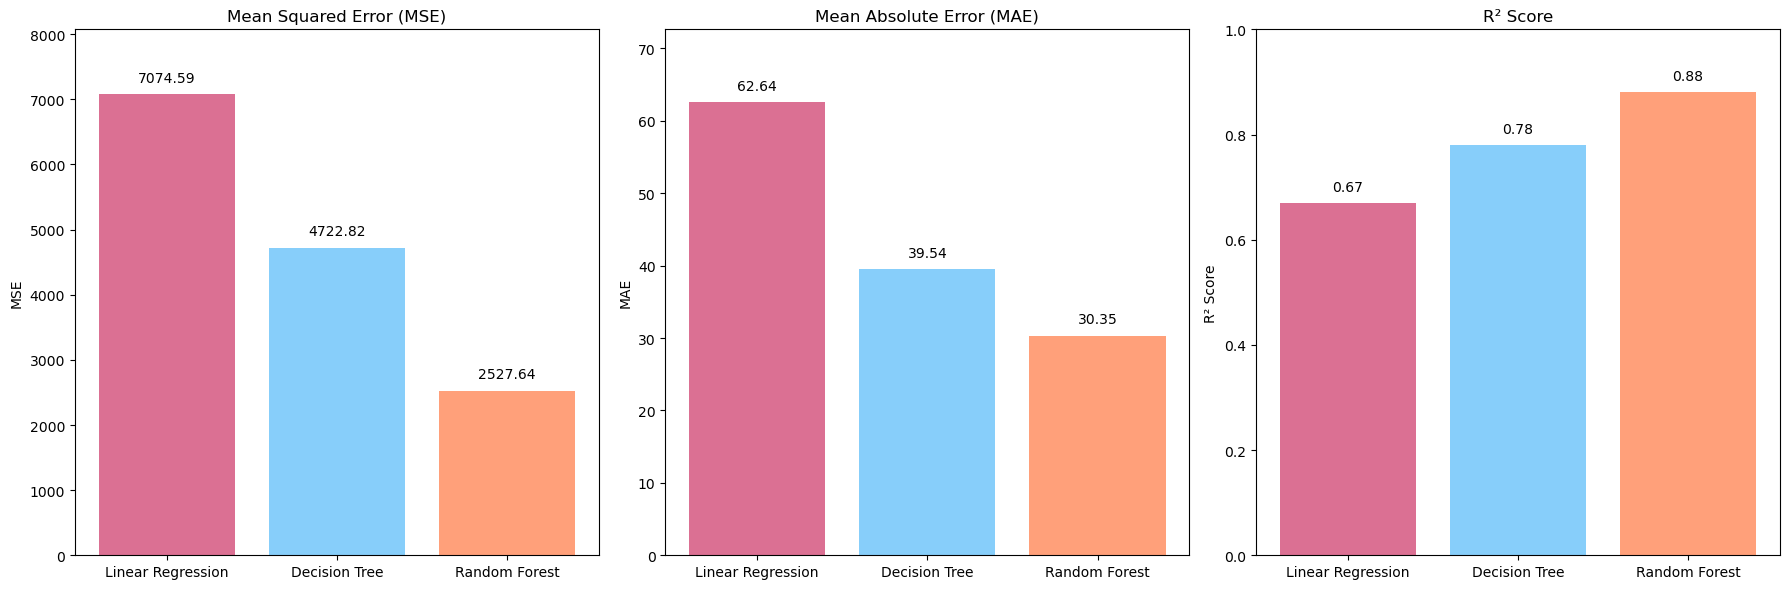

In [18]:
# creating bar plots to visually compare the performance of the Linear Regression, Decision Tree Regressor, and Random Forest Regressor models
import matplotlib.pyplot as plt
import numpy as np
# Metrics for each model
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
mse_scores = [7074.59, 4722.82, 2527.64]
mae_scores = [62.64, 39.54, 30.35]
r2_scores = [0.67, 0.78, 0.88]

# Set up the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot MSE
axes[0].bar(models, mse_scores, color=['palevioletred', 'lightskyblue', 'lightsalmon'])
axes[0].set_title('Mean Squared Error (MSE)')
axes[0].set_ylabel('MSE')
axes[0].set_ylim(0, max(mse_scores) + 1000)  # Adjust y-axis limit for better visualization

# Plot MAE
axes[1].bar(models, mae_scores, color=['palevioletred', 'lightskyblue', 'lightsalmon'])
axes[1].set_title('Mean Absolute Error (MAE)')
axes[1].set_ylabel('MAE')
axes[1].set_ylim(0, max(mae_scores) + 10)  # Adjust y-axis limit for better visualization

# Plot R² Score
axes[2].bar(models, r2_scores, color=['palevioletred', 'lightskyblue', 'lightsalmon'])
axes[2].set_title('R² Score')
axes[2].set_ylabel('R² Score')
axes[2].set_ylim(0, 1)  # R² Score ranges from 0 to 1

# Add value labels on top of each bar
for i, ax in enumerate(axes):
    for j, v in enumerate([mse_scores, mae_scores, r2_scores][i]):
        ax.text(j, v + 0.02 * max([mse_scores, mae_scores, r2_scores][i]), 
                f'{v:.2f}', ha='center', va='bottom')

# Adjust layout and display
plt.tight_layout()
plt.show()

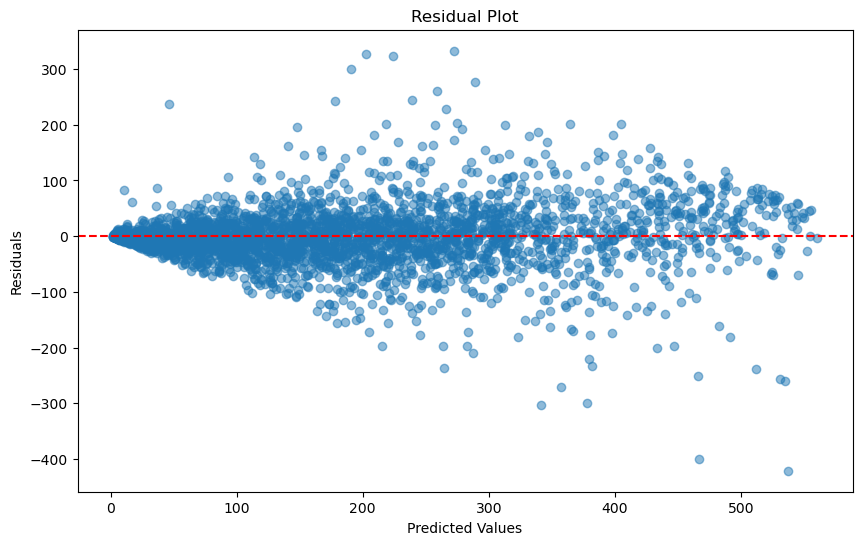

In [19]:
# Residual analysis:  Identifying patterns in the errors to improve the model.
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred_forest

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_forest, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

The residual plot indicates that the model has room for improvement, particularly in handling higher bike rental counts and reducing heteroscedasticity. By hyperparameter tuning, and cross-validation, we can build a more robust and accurate model.